In [2]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from skimage.io import imsave
from skimage import img_as_ubyte

2024-06-27 15:25:49.692090: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from zipfile import ZipFile
with ZipFile("stage1_train.zip","r") as zip_ref:
    zip_ref.extractall("./stage1_train")
    
with ZipFile("stage1_test.zip","r") as zip_ref:
    zip_ref.extractall("./stage1_test")

In [4]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

TRAIN_PATH = 'stage1_train/'
TEST_PATH = 'stage1_test/'

train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

X = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

In [5]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    y[n] = mask 

Resizing training images and masks


100%|██████████| 670/670 [05:03<00:00,  2.21it/s]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
test_images = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    test_images[n] = img

print('Done!')

Resizing test images


100%|██████████| 65/65 [00:01<00:00, 34.56it/s]

Done!


/var/folders/29/tp1ljs1j62j84hh8y_0yq5280000gn/T/ipykernel_70167/2641527194.py:4: UserWarning: data/VALID/image/image_54.png is a low contrast image
  imsave(image_filename, img_as_ubyte(X_test[i]))
/var/folders/29/tp1ljs1j62j84hh8y_0yq5280000gn/T/ipykernel_70167/2641527194.py:4: UserWarning: data/VALID/image/image_91.png is a low contrast image
  imsave(image_filename, img_as_ubyte(X_test[i]))
/var/folders/29/tp1ljs1j62j84hh8y_0yq5280000gn/T/ipykernel_70167/2641527194.py:4: UserWarning: data/VALID/image/image_103.png is a low contrast image
  imsave(image_filename, img_as_ubyte(X_test[i]))
/var/folders/29/tp1ljs1j62j84hh8y_0yq5280000gn/T/ipykernel_70167/2641527194.py:4: UserWarning: data/VALID/image/image_120.png is a low contrast image
  imsave(image_filename, img_as_ubyte(X_test[i]))
/var/folders/29/tp1ljs1j62j84hh8y_0yq5280000gn/T/ipykernel_70167/2641527194.py:13: UserWarning: data/VALID/mask/mask_120.png is a low contrast image
  imsave(mask_filename, img_as_ubyte(np.squeeze(y_tes

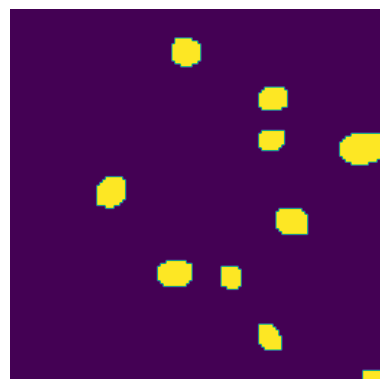

In [9]:
for i in range(len(X_test)):
    # Sauvegarde de l'image
    image_filename = f'data/TRAIN/image/image_{i}.png'
    imsave(image_filename, img_as_ubyte(X_train[i]))

    # Affichage du masque
    plt.axis("off")
    plt.imshow(np.squeeze(y_train[i]))
    #plt.show()

    # Sauvegarde du masque
    mask_filename = f'data/TRAIN/mask/mask_{i}.png'
    imsave(mask_filename, img_as_ubyte(np.squeeze(y_train[i])))